# Extract Summary

## Import Library & Read Data

No handles with labels found to put in legend.


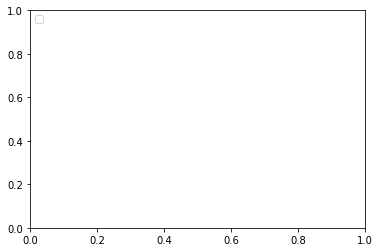

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['legend.numpoints'] = 2
plt.legend(loc='upper left', numpoints=1)
from datetime import date

In [71]:
file_path = "./data_input/data.csv"
id=['936','1178']

fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

In [72]:
campaigns.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,25/08/2017,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,26/08/2017,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,26/08/2017,26/08/2017,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,27/08/2017,27/08/2017,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,29/08/2017,29/08/2017,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


In [73]:
  grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()
grouped
df = grouped[grouped['campaign_id'] == "1178"].loc[:,['age', 'reporting_start', 'total_conversion']]
df

,age,reporting_start,total_conversion
0,30-34,19/08/2017,33.0
1,30-34,20/08/2017,38.0
2,30-34,21/08/2017,24.0
3,30-34,22/08/2017,56.0
4,30-34,23/08/2017,135.0
5,30-34,24/08/2017,14.0
6,30-34,25/08/2017,65.0
7,30-34,26/08/2017,82.0
8,30-34,27/08/2017,12.0
9,30-34,28/08/2017,73.0


## Completing `extract_summary` module

Use the following cell to help you fill in the `extract_summary` module on `send_email.py`.

In this section, you are required to extract 6 informations:

- `start_date`: the earliest reporting date for both campaign
- `end_date`: the latest reporting date for both campaign
- `total_spent`: the total marketing cost spent on both campaign
- `total_conversion`: number of conversions on both campaign

In [74]:
# Make sure to passed in appropriate preprocessing before extracting the start and end date
campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'], dayfirst = True)

start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

total_spent = int(campaigns['spent'].sum())
total_conversion = int(campaigns['total_conversion'].sum())

print(start_date)
print(end_date)
print(total_spent)
print(total_conversion)

18 Aug 2017
30 Aug 2017
19470
1398


- `cpc`: cost-per-click (obtained by dividing the total cost with total conversion for each campaign; we will have two cpc values since we have two campaigns--campaign 936 and 1178) 

In [75]:
# Create a cost per conversion dictionary per campaign
# Cost per conversion is spent divided by total conversion

cpc = campaigns.groupby(['campaign_id'])[["spent", "total_conversion"]].sum()
cpc['CPC'] = cpc["spent"]/cpc["total_conversion"]

id = cpc.index.tolist()

cpc_each = dict()
for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

cpc_each

{'1178': 15.91, '936': 8.13}

Once you're done, go to the `extract_summary` module on `send_email.py`, **fill up the skeleton with the value you used in previous cells**, and **save the changes**.

If you have fill up the skeleton correctly, try to run below cell, it will return a dictionary as such:


In [76]:
from send_email import extract_summary

extract_summary()

{'start_date': '18 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

# Create Plot
## Import Data

Read the dataset and filter the campaign_id to only `936` and `1178`, it is listed as an adjustable parameter of `id`. We are going to filter out all the rows that contain variable spent equals to 0, this will eliminate all rows when the ads is not actually running:

In [77]:
fb = pd.read_csv(file_path, parse_dates=[1,2])
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0] 

campaigns.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


## Completing `create_plot` module

Complete the following sections to help you fill in the `create_plot` module on `send_email.py`.

### Aggregate total conversion per age

You are required to create two bar plots which shows the total conversion of each campaign by the audience's age group. 

Create a group by aggregation of each campaign, date, and age group and calculate the total conversion of each group!

In [78]:
# grouped = campaigns.groupby(by=['___', '___', '___'], as_index=False)['___'].___
grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()
grouped.head()

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0


### Create the plot

Next we'll prepare a figure object to store the plot as one image. Once we have that, we'll iterate through all the campaign, and create a barplot for each campaign using a subplot() method.

```
fig = plt.figure(1, figsize=(15,6))

# Iterate to create 1 plot campaign at a time
    for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    ...
```

Since we'd like create the plot for each campaign, the next line specified on the loop is basically creating a simple bar plot using pandas DataFrame:

```
df = grouped[grouped[___] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
df['reporting_start'] = df['reporting_start'].dt.date
pivot = df.pivot(index='___', columns='___', values='___').fillna(0)
pivot.plot.bar(ax=plt.gca())
```
The pivot DataFrame for each campaign you're trying to create will have the following structure:

![](assets/pivot.PNG)




Finally you'll add a bit of plot tidying up before saving it as a PNG file:

```
fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

# Save file to plot folder
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(imagename)
```
See if you have successfully saved a new PNG file under the plot folder named as today's date. See if that work out for you!


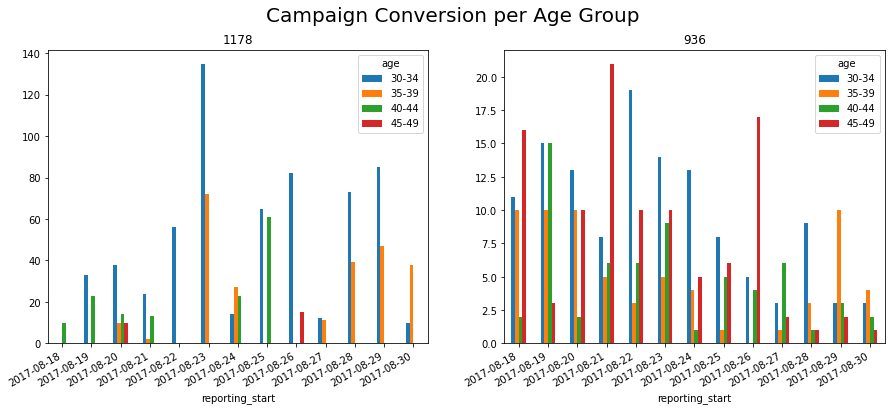

In [79]:
fig = plt.figure(1, figsize=(15,6))

## Iterate to create 1 plot campaign at a time
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
      
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    #pivot = pivot.transpose()
    pivot.plot.bar(ax=plt.gca(), title = campaign)

fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

# Save file to plot folder
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(imagename)


In [19]:
pivot

age,30-34,35-39,40-44,45-49
reporting_start,,,,
2017-08-18,11.0,10.0,2.0,16.0
2017-08-19,15.0,10.0,15.0,3.0
2017-08-20,13.0,10.0,2.0,10.0
2017-08-21,8.0,5.0,6.0,21.0
2017-08-22,19.0,3.0,6.0,10.0
2017-08-23,14.0,5.0,9.0,10.0
2017-08-24,13.0,4.0,1.0,5.0
2017-08-25,8.0,1.0,5.0,6.0
2017-08-26,5.0,0.0,4.0,17.0


Once you're done, go to the `create_plot` module on `send_email.py`, **fill up the skeleton with the value you used in previous cells**, and **save the changes**.
